,CasosDia,Temp. Ins. (C),Umi. Ins. (%),Chuva (mm),CasosDiasTarget
Data,,,,,
2020-03-22,3,26.616667,42.500000,4.453936,4
2020-03-23,3,26.462500,52.833333,4.453936,2
2020-03-24,3,24.812500,64.541667,8.800000,2
2020-03-25,1,22.008333,82.000000,28.800000,2
2020-03-26,0,21.225000,83.666667,0.200000,3
...,...,...,...,...,...
2023-12-27,8,22.787500,80.750000,4.453936,3
2023-12-28,4,24.291667,70.416667,4.453936,6
2023-12-29,7,25.687500,69.083333,4.453936,6


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1380 entries, 2020-03-22 to 2023-12-31
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CasosDia         1380 non-null   int64  
 1   Temp. Ins. (C)   1380 non-null   float64
 2   Umi. Ins. (%)    1380 non-null   float64
 3   Chuva (mm)       1380 non-null   float64
 4   CasosDiasTarget  1380 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 64.7 KB


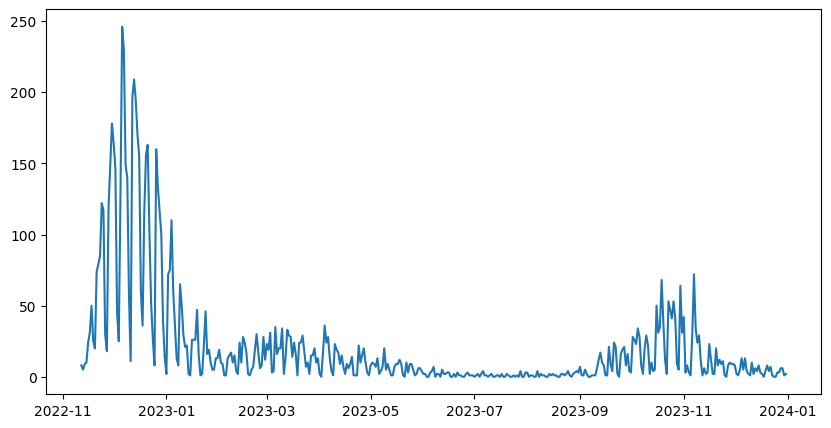

In [1]:
##IMPORTANDO

#from google.colab import drive
#drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#import seaborn as sns
import statistics
from scipy.stats import mannwhitneyu
from sklearn.metrics import mean_squared_error, mean_absolute_error
import sklearn as sk
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVR 
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score
from scipy.stats import mannwhitneyu
from scipy import stats
from sklearn.preprocessing import LabelEncoder

# Evitar avisos
import warnings
warnings.filterwarnings("ignore")


df = pd.read_csv("planilhas/dfDias7desloc.csv", sep=';', parse_dates=['Data'], index_col="Data")
display(df)
df.info()

split = int(0.7 * len(df))
treino = df[:split]
teste = df[split:]


x_treino = treino.drop(columns='CasosDiasTarget')
y_treino = treino['CasosDiasTarget']

x_teste = teste.drop(columns='CasosDiasTarget')
y_teste = teste['CasosDiasTarget']

# Plotar as previsões em relação aos valores reais

plt.figure(figsize=(10, 5))
plt.plot(y_teste)



# MLP


In [2]:
#MLP


param_grid = {
    'hidden_layer_sizes': [(5,5,5), (5,10,15), (5,10,10), (5,10,15)],
    'activation': ['logistic', 'relu', 'identity'],
    'solver': ['adam'],
    'max_iter': [400,600,800,1000],
    'learning_rate_init': [0.001, 0.002, 0.003, 0.004,0.005,0.006,0.007,0.008,0.009,0.01]
}
melhor_validacao_mlp = float('inf')
best_paramsMLP = {}

for hidden_layer_sizes in param_grid['hidden_layer_sizes']:
    for activation in param_grid['activation']:
        for max_iter in param_grid['max_iter']:
            for learning_rate_init in param_grid['learning_rate_init']:
                mlp = MLPRegressor(
                    hidden_layer_sizes=hidden_layer_sizes,
                    activation=activation,
                    solver='adam',
                    max_iter=max_iter,
                    learning_rate_init=learning_rate_init
                )
                mlp.fit(x_treino, y_treino)
                opiniao = mlp.predict(x_treino)
                mse_validacao_mlp = mean_squared_error(y_treino, opiniao)
                
                if (mse_validacao_mlp < melhor_validacao_mlp):
                    melhor_validacao_mlp = mse_validacao_mlp
                    best_paramsMLP = {
                        'hidden_layer_sizes': hidden_layer_sizes,
                        'activation': activation,
                        'max_iter': max_iter,
                        'learning_rate_init': learning_rate_init
                    }


print(melhor_validacao_mlp)
print(mse_validacao_mlp)
print(best_paramsMLP)

mlp = MLPRegressor(
                hidden_layer_sizes=best_paramsMLP['hidden_layer_sizes'],
                activation=best_paramsMLP['activation'],
                solver='adam',
                max_iter=best_paramsMLP['max_iter'],
                learning_rate_init=best_paramsMLP['learning_rate_init']
            )

mlp.fit(x_treino, y_treino)
opiniao_mlp = mlp.predict(x_teste)

mae = mean_absolute_error(y_teste, opiniao_mlp).round(2)
mse = mean_squared_error(y_teste, opiniao_mlp).round(2)
rmse = np.sqrt(mse).round(2)




2975.6893049971
3115.8125795778265
{'hidden_layer_sizes': (5, 10, 15), 'activation': 'relu', 'max_iter': 400, 'learning_rate_init': 0.005}


In [3]:
dfMLP = pd.DataFrame({
    'hidden_layer_sizes':[best_paramsMLP['hidden_layer_sizes']],
    'activation':[best_paramsMLP['activation']],
    'max_iter':[best_paramsMLP['max_iter']],
    'learning_rate_init':[best_paramsMLP['learning_rate_init']],
    'MAE': [mae],
    'MSE': [mse],
    'RMSE': [rmse]
})
print("O ÚLTIMO VALOR (20) É A MÉDIA !!!")
display(dfMLP)
dfMLP.to_csv('resultadosModelos/dfMLP.csv', sep = ';', index = False, encoding='UTF-8')


O ÚLTIMO VALOR (20) É A MÉDIA !!!


,hidden_layer_sizes,activation,max_iter,learning_rate_init,MAE,MSE,RMSE
0,"(5, 10, 15)",relu,400,0.005,12.29,409.47,20.24


In [4]:
import joblib

joblib.dump(opiniao_mlp, 'predsSalva/mlp.pkl')




['predsSalva/mlp.pkl']

# CHECKPOINT


In [2]:
import joblib
opiniao_mlp = joblib.load('predsSalva/mlp.pkl')

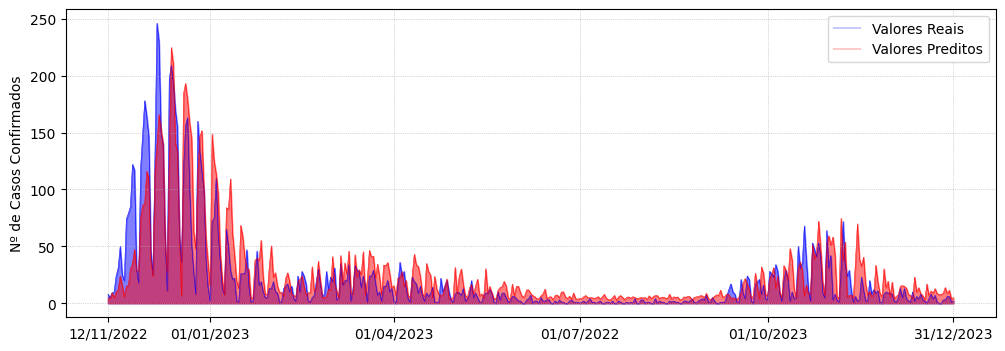

Numero de casos reais:  8737
Numero de casos predito:  10530


In [4]:
import matplotlib.pyplot as plt
import pandas as pd


aux=opiniao_mlp
serie = pd.Series(aux, index=x_teste.index)

stringGraf = 'graficos/4-'+ 'mlp' + '.pdf'
plt.figure(figsize=(12, 4))
plt.plot(y_teste, label='Valores Reais', color='blue', linewidth=0.3)
plt.plot(serie, label='Valores Preditos', color='red', linewidth=0.3)
plt.fill_between(x_teste.index, y_teste, color='blue', alpha=0.5)
plt.fill_between(x_teste.index, serie, color='red', alpha=0.5)  # Pinta a área entre as linhas
plt.ylabel('Nº de Casos Confirmados')
plt.legend()
ticks_pos = [df[split:].index[0], '2023-01','2023-04', '2023-07','2023-10', df[split:].index[-1]]
ticks_labels = [
    '12/11/2022',
    '01/01/2023',
    '01/04/2023',
    '01/07/2022',
    '01/10/2023',
    '31/12/2023',
]
plt.grid(linestyle=':', linewidth=.5, alpha=1)
plt.xticks(ticks_pos, labels=ticks_labels)
plt.savefig(stringGraf, dpi=300, bbox_inches="tight")
plt.show()

n_pred = int(aux.sum())
print('Numero de casos reais: ', y_teste.sum())
print('Numero de casos predito: ', n_pred)
